
# <h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Business Understanding">Business Understanding</a></li>
        <li><a href="#Data Understanding">Data Understanding</a></li>
        <li><a href="#Data Preparation">Data Preparation</a></li>
        <li><a href="#Data Modeling">Modeling</a></li>
        <li><a href="#Model Evaluation">Model Evaluation</a></li>
    </ol>
</div>
<br>
<hr>


## 1.BUSINESS UNDERSTANDING:





### 1.1 Problem:

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

### 1.2 Goal:

**1.2.1 Project Goal:**

   Building a model to predict whether the customers who bought health insurance from our company last year will also be interested in Vehicle Insurance provided by the company.

**1.2.2 Criteria for successful project:**

   Building a model to predict with acceptable accuracy for the classes (0 and 1). The metric for this problem is Accuracy, F1, recall and precision score to see how well our models perform on both classes.
    
   A good model should achieve an accuracy score (preferably 90% or higher), and should have high F1 score, precision, and recall score as high as possible based on our dataset (if we encounter an imbalanced dataset)
    
   Regard of recall and precision score in our problem. The model should have a higher precision score than recall if possible, high precision score means in our positives predictions, there should be a high percentage of true class 1. While recall could lead to a low percentage of true class 1 in our predictions. This could lead to the company wasting money and resources on a high number of false positive clients.

### 1.3 Analytics Approach:
=> Classification model

## 2. DATA  UNDERSTANDING

### **2.1 Data Description:**

This project relates to the Vehicle Insurance data set, which can be found in the file train.csv in the data folder. It contains a number of variables for 381109 different ID customers in a company. The variables are:

1. **ID:** Unique ID for the customer
2. **Gender:** Gender of the customer: 
    1: Male  0: female
3. **Age:** Age of the customer
4. **Driving_License:**
    0 : Customer does not have DL
    1 : Customer already has DL
5. **Region_Code:**	Unique code for the region of the customer
6. **Previously_Insured:**	
    1 : Customer already has Vehicle Insurance 
    0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age:**	Age of the Vehicle
8. **Vehicle_Damage:**	
    1: Customer got his/her vehicle damaged in the past. 
    0: Customer didn't get his/her vehicle 9. damaged in the past.
10. **Annual_Premium:**	The amount customer needs to pay as premium in the year
11. **Policy_Sales_Channel:**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
12. **Vintage:** Number of Days customer has been associated with the company
13. **Response:**
    1 : Customer is interested
    0 : Customer is not interested

### **2.2 Exploratory Data Analysis:**

**Import library:** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample,shuffle

%matplotlib inline

**Load dataset**

In [2]:
# load dataset
train_set= pd.read_csv('train.csv')

In [3]:
train_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Check for null values**

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Check for NaN values**

In [5]:
print(f"Missing values are present in data: {train_set.isna().sum().any()}")

Missing values are present in data: False


**Dataset Descriptive Statistics**

In [6]:
# convert catergorical variable to numeric variable for eploring purpose

train_set['Gender']= pd.get_dummies(train_set["Gender"],drop_first = True, dtype='int')
train_set['Vehicle_Age']= train_set['Vehicle_Age'].map({'< 1 Year' : 0,'1-2 Year': 1,'> 2 Years': 2}).astype(int)
train_set['Vehicle_Damage'] = pd.get_dummies(train_set["Vehicle_Damage"],drop_first = True, dtype='int')

In [7]:
train_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [8]:
train_set.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Let's see the correlation between features and response variable!**

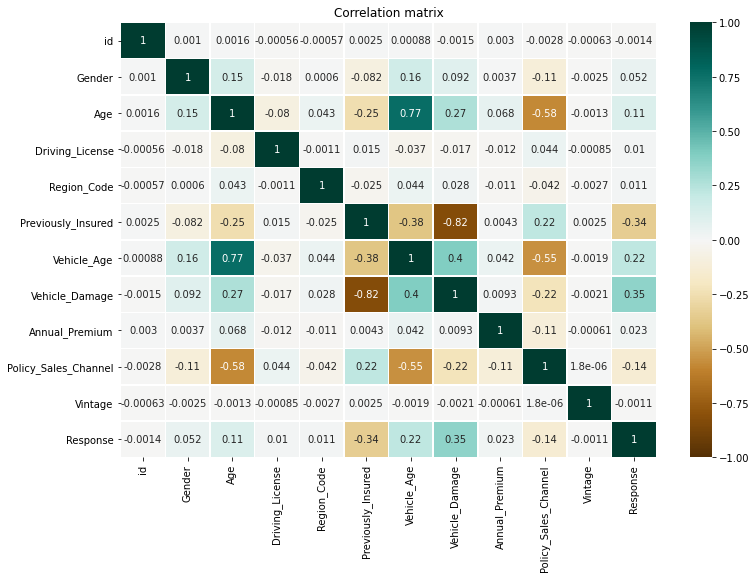

In [12]:
# visualize with heatmap to check correlations

def corr_heatmap(df):
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax


corr_heatmap(train_set)

**Data Visualization**

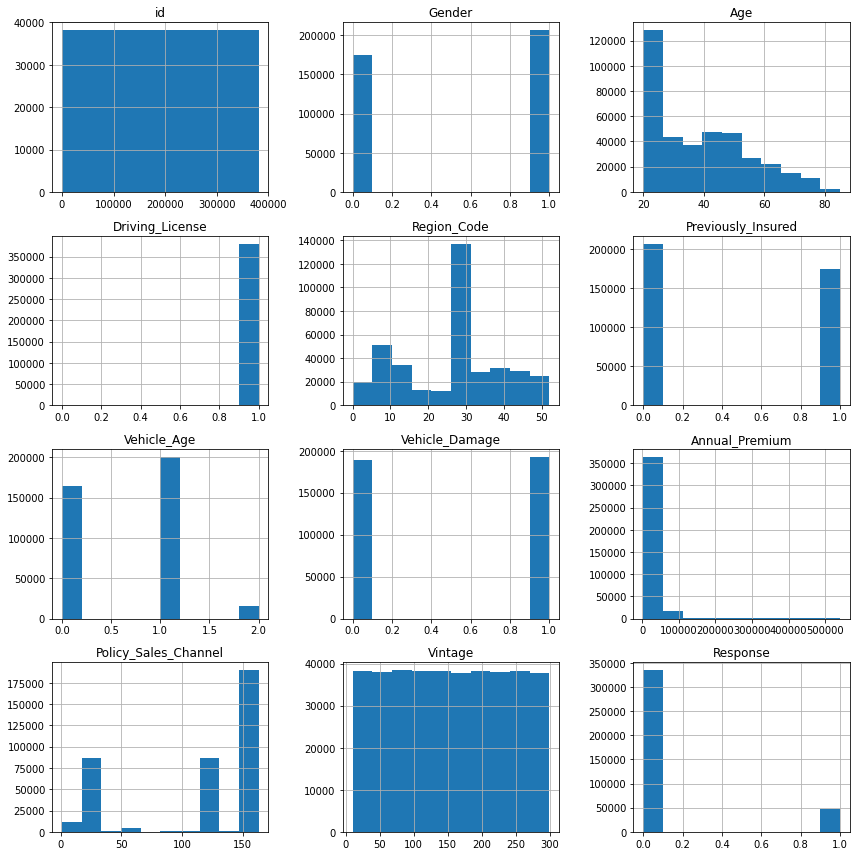

In [13]:
# visualize the distribution of dataset
train_set.hist(figsize=(12,12))
plt.tight_layout()

**Response**

(-1.25, 1.25, -1.25, 1.25)

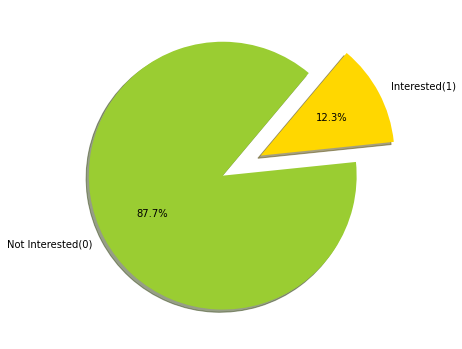

In [9]:
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold']
train_set['Response'].value_counts().plot(kind='pie',labels=['Not Interested(0)','Interested(1)'], colors=color, explode=(0.02,0.3),startangle=50,
                                          shadow=True,autopct="%0.1f%%")
plt.ylabel('')
plt.axis('on')

**Vehicle Damage vs Response**


In [10]:
def visualize_category_ratio(response_column, feature_column):
    fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), dpi = 100)
    plt.tight_layout()
    feature_column.value_counts().plot(kind='pie', ax= axes[0], startangle=50,autopct="%0.1f%%")
    pd.crosstab(feature_column,response_column).plot(kind='bar', ax= axes[1])

    axes[0].set_title('Label Distribution in Training Set', fontsize = 10)
    axes[1].set_title('Label Count in Training Set', fontsize =10)
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    plt.axis('on')

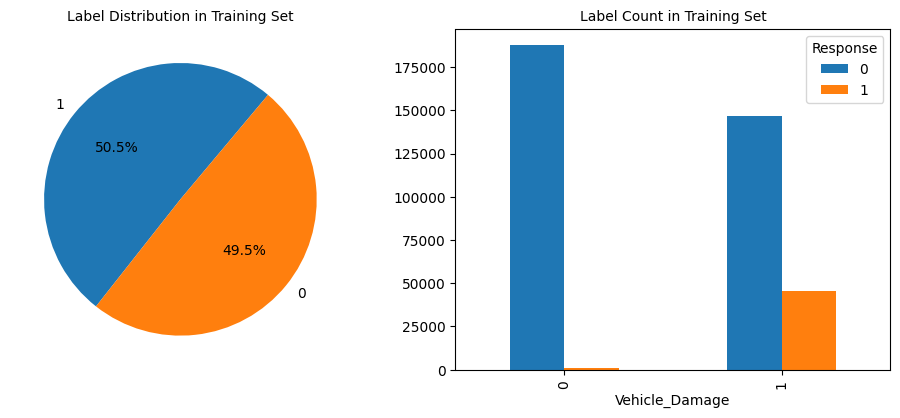

In [11]:
visualize_category_ratio(train_set['Response'], train_set['Vehicle_Damage'])

**Previous_Insured vs Response**

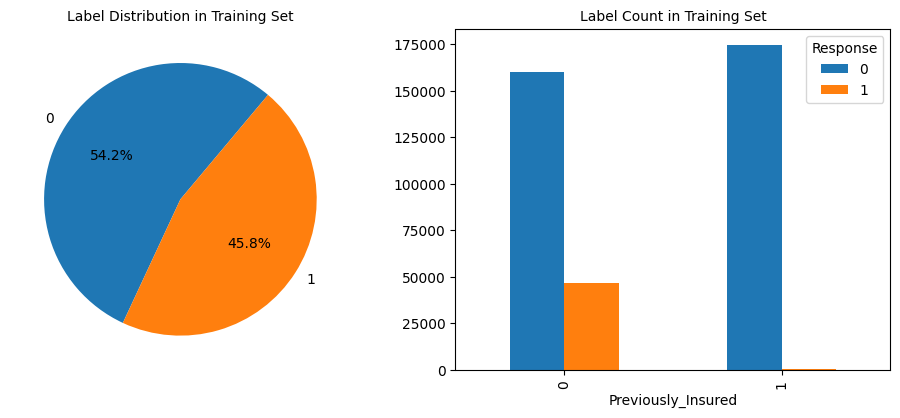

In [12]:
visualize_category_ratio(train_set['Response'], train_set['Previously_Insured'])

**Vehicle Age vs Repsonse**

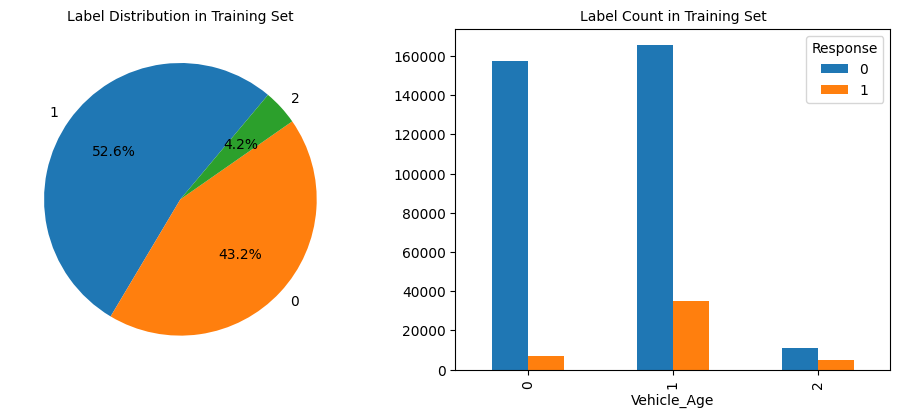

In [13]:
visualize_category_ratio(train_set['Response'], train_set['Vehicle_Age'])

**Gender vs Response**

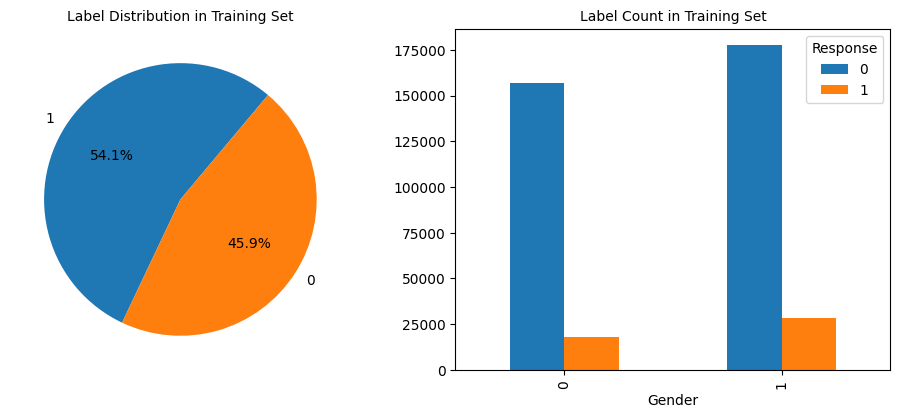

In [14]:
visualize_category_ratio(train_set['Response'], train_set['Gender'])

**Policy Sales Channel vs Response**

In [15]:
def visualize_continuous_features(train_set,feature_column, feature_name):
    print("{0} distribution according to Response".format(feature_name))
    facetgrid = sns.FacetGrid(train_set,hue="Response",aspect = 4)
    facetgrid.map(sns.kdeplot,feature_name, shade = True)
    facetgrid.set(xlim = (0,feature_column.max()))
    facetgrid.add_legend()

Policy_Sales_Channel distribution according to Response


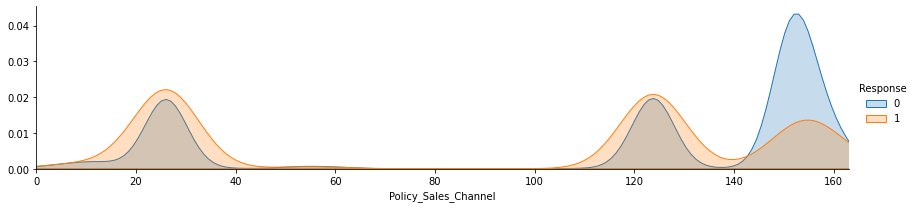

In [16]:
visualize_continuous_features(train_set,train_set["Policy_Sales_Channel"], feature_name="Policy_Sales_Channel")

**Age vs Response**

Age distribution according to Response


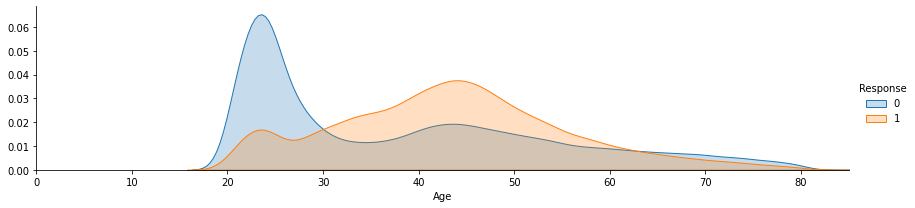

In [17]:
visualize_continuous_features(train_set,train_set["Age"], feature_name="Age")

**Anual_Premium vs Response**

Annual_Premium distribution according to Response


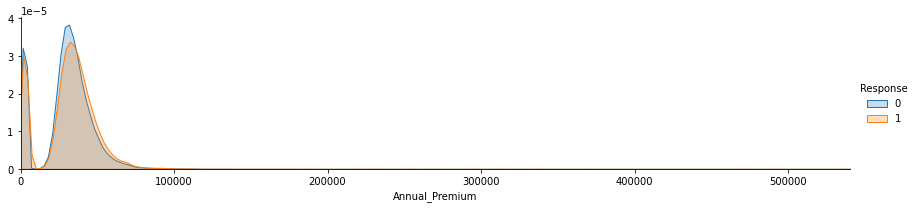

In [18]:
visualize_continuous_features(train_set, train_set["Annual_Premium"], feature_name="Annual_Premium")

### 2.3 Conclusion:

**1. Category Ratio:**
- The dataset has a large difference in the category ratio: 87.7% Not interested, 12.3% Interested

**2. Outliers:**
* A quick look of our statistics, we can see that Age and Annual_Premium has outliers with max value exceeds 1.5*IQR ( the highest age is 85 and  the highest annual_premium is 540k rupees)
* Other fields don't have outliers

**3. Correlation:**

* From the heatmap we can see how these features effect each other and effect the response variable. The score ranges from -1 to 1 and indicates if there is a strong linear relationship — either in a positive or negative direction. When the score is close to 0, saying: “Nothing interesting here”.

* The correlation matrix is symmetric which means that the correlation is the same whether you calculate the correlation of A and B or the correlation of B and A.

**4. Features:**

Question: **What are features of these 12.3% of customers who interested in our vehicle insurance ?**
- **Vehicle damage:** People have vehicle damage more interested in our vehicle insurance (**23.7%**)
- **Previous_Insured:** People who did not have Vehicle insurance more interested in our Vehicle insurance (**22.5%**)
- **Vehicle Age:** 
    + Most of the people have interested in our insurance have used Vehicle for 1-2 years or over 2 years. Their interesting in Vehicle insurance at 17.3% and 29.3% respectively.
    + Only 4.3% of the customers who have used the vehicle for less than 1 year are interested in Vehicle insurance out of 43.2% of the total people who have used the Vehicle for less than 1 year.
- **Policy Sales Channel:** Channels from 145 - 160 reach the most customers, but only 1/5 (20%) customers who reached are interested in our insurance, other channels about 50% customers interested in Vehicle insurance
- **Customer's Age:** 
    + The customer group in the age group of 20 - 30 accounts the most in the dataset, but the level of interest in Vehicel insurance is only 20%.
    + About 67% of customers in the age group of 30 - 60 and 50% of customers in the age group of 60 - 80 are interested in Vehicle insurance
- **Customer's Gender:** There is no big difference in the distribution of customers' gender in the dataset. Male tend to be slightly more interested in Vehicle insurance than Female (Male: 13.8%, female: 10.3%)
- **Annual_Premium:** People don't pay much for Insurance. The annual premium is distributed mostly in the range of 2630 - 100000 VND

## 3. DATA PREPARATION

**Drop Outliers:** Drop entries which has outlier in column 'Annual_Premium'

In [14]:
# drop outliers from dataset
def remove_outliers(dataset):
    print(f'Count of rows before filtering outlier: {len(dataset)}')
    
    for column in train_set.columns[:-1]:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        dataset= dataset[(dataset[column] >= low_limit) & (dataset[column] <= high_limit)]
        
    print(f'Count of rows after filtering outlier: {len(dataset)}')
    
    return dataset

In [15]:
train_set= remove_outliers(train_set) 

Count of rows before filtering outlier: 381109
Count of rows after filtering outlier: 370001


**Resample:** Handle embalanced dataset with Up-Sampling technique


In [16]:
# handle embalanced datast:
def get_balanced_dataset_using_upSampling(train_set):
      df_majority = train_set[train_set['Response']==0]
      df_minority = train_set[train_set['Response']==1]
      df_minority_upsampled = resample(df_minority, replace=True, n_samples=train_set['Response'].value_counts()[0]
                                       ,random_state = 123)
      balanced_df = pd.concat([df_minority_upsampled, df_majority])
      balanced_df = shuffle(balanced_df)
      return balanced_df

In [17]:
balanced_df= get_balanced_dataset_using_upSampling(train_set)
balanced_df.Response.value_counts()

0    324889
1    324889
Name: Response, dtype: int64

**Feature Selection**

According to the correlation matrix above, we drop ID, Driving_License, Region_Code and Vintage due to these features almost don't have any correlation with our target field.

In [18]:
y = balanced_df.Response
x = balanced_df.drop(columns=['id', 'Driving_License', 'Region_Code','Vintage','Response'], axis= 1)

**Split Dataset**

In [19]:
# create prepared_data function
def train_test_split_dataset(x,y,train_size, random_state):
      # normalize x
        x= preprocessing.StandardScaler().fit_transform(x)
    
      # train_test_split
        x_train, x_test,y_train,y_test= train_test_split(x, y, train_size=train_size,random_state= random_state)
        
        print("Train set: ", x_train.shape, y_train.shape)
        print("Validation set: ", x_test.shape, y_test.shape)
        
        return x_train, x_test, y_train, y_test

In [20]:
x_train, x_test, y_train, y_test= train_test_split_dataset(x,y,train_size=0.8, random_state=666)

Train set:  (519822, 7) (519822,)
Validation set:  (129956, 7) (129956,)


## 4. MODELING

We need to build a class prediction model, so I propose we use KNN Model as baseline model, Ensemble model like Random Forest, CatBoost and Voting. Then we compare models and choose the best model for our problem.

In [21]:
def get_prediction_classes(model, x, y):
    predictions= model.predict(x)
    groundtruths= y
    
    return predictions, groundtruths

# show_confusion_matrix function
def show_confusion_matrix(predictions, groundtruths, size=1):
    
    # confusion matrix
    class_names = ['0', '1'] 
    CM = confusion_matrix(groundtruths, predictions)
    plt.figure(figsize=(5*size, 5*size))
    sns.set()
    target_labels = np.unique(groundtruths)
    sns.heatmap(CM.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion matrix',fontdict= {"size": 16})
    plt.xlabel('true label',fontdict={"size": 14})
    plt.ylabel('predicted label',fontdict={"size": 14})
    plt.show()
    
    # Metrics
    print('Accuracy_score:',round(accuracy_score(predictions, groundtruths)*100,1))
    print('Precision_score:',round(precision_score(predictions, groundtruths)*100,1))
    print('Recall_score: ',round(recall_score(predictions, groundtruths)*100,1))
    print('F1_score:',round(f1_score(predictions, groundtruths)*100,1))

### 4.1 Build Model

**KNeighborsClassifier model**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3,5,7],             # number of K_neighbors
              'leaf_size': [30, 40, 50],          # Leaf size passed
              'weights': ['uniform','distance'] }  # Weight function

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid ,cv=5,scoring="accuracy")
knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [30, 40, 50], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
# print out best score and best estimator
print("Best score: %f using %s" % (knn_model.best_score_, knn_model.best_estimator_))

Best score: 0.880603 using KNeighborsClassifier(n_neighbors=3, weights='distance')


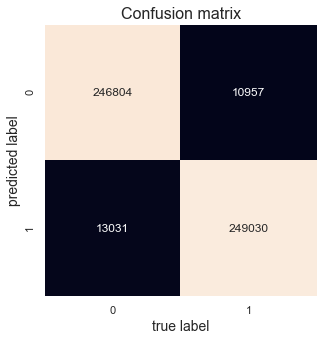

Accuracy_score: 95.4
Precision_score: 95.8
Recall_score:  95.0
F1_score: 95.4


In [24]:
#predict and perform confusion matrix on Training Set
knn_predictions, knn_groundtruths = get_prediction_classes(knn_model, x_train, y_train)

# show confusion matrix
show_confusion_matrix(knn_predictions, knn_groundtruths, size=1)

**RandomForestClassifier Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'criterion': ['entropy', 'gini'],  # algorithms use to calculate distance
              'n_estimators': [100,200,300]}    # number of base models

rfc_model = GridSearchCV(RandomForestClassifier(), param_grid ,cv=5,scoring="accuracy")
rfc_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [26]:
# print out best score and best estimator
print("Best score: %f using %s" % (rfc_model.best_score_, rfc_model.best_estimator_))

Best score: 0.906437 using RandomForestClassifier(n_estimators=200)


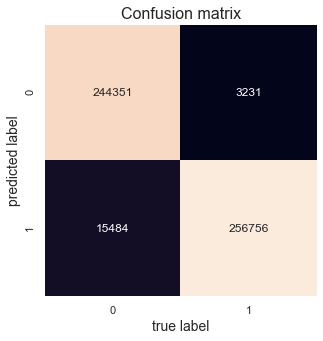

Accuracy_score: 96.4
Precision_score: 98.8
Recall_score:  94.3
F1_score: 96.5


In [27]:
#predict and perform confusion matrix on Training Set
rfc_predictions, rfc_groundtruths = get_prediction_classes(rfc_model, x_train, y_train)

# show confusion matrix
show_confusion_matrix(rfc_predictions, rfc_groundtruths, size=1)

**CatBoostClassifier Model**

In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'depth': [3, 5, 8, 9, 10],
              'iterations': [5,10,20,30,50],
              'learning_rate': [0.9,0.8,0.7,0.6,0.5]} 

catboost_model= GridSearchCV(CatBoostClassifier(), param_grid ,cv=5,scoring="accuracy", n_jobs=-1)
catboost_model.fit(x_train, y_train)

0:	learn: 0.4726949	total: 111ms	remaining: 5.45s
1:	learn: 0.4376393	total: 185ms	remaining: 4.43s
2:	learn: 0.4272244	total: 254ms	remaining: 3.98s
3:	learn: 0.4230067	total: 331ms	remaining: 3.8s
4:	learn: 0.4214735	total: 409ms	remaining: 3.68s
5:	learn: 0.4201769	total: 487ms	remaining: 3.57s
6:	learn: 0.4196933	total: 562ms	remaining: 3.45s
7:	learn: 0.4191941	total: 628ms	remaining: 3.29s
8:	learn: 0.4181218	total: 693ms	remaining: 3.16s
9:	learn: 0.4177497	total: 770ms	remaining: 3.08s
10:	learn: 0.4173866	total: 843ms	remaining: 2.99s
11:	learn: 0.4169655	total: 915ms	remaining: 2.9s
12:	learn: 0.4166643	total: 991ms	remaining: 2.82s
13:	learn: 0.4158689	total: 1.06s	remaining: 2.72s
14:	learn: 0.4155951	total: 1.13s	remaining: 2.63s
15:	learn: 0.4152996	total: 1.19s	remaining: 2.53s
16:	learn: 0.4150148	total: 1.26s	remaining: 2.44s
17:	learn: 0.4146677	total: 1.32s	remaining: 2.35s
18:	learn: 0.4143557	total: 1.39s	remaining: 2.27s
19:	learn: 0.4141254	total: 1.45s	remaining

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ffd3ff6b350>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 9, 10],
                         'iterations': [5, 10, 20, 30, 50],
                         'learning_rate': [0.9, 0.8, 0.7, 0.6, 0.5]},
             scoring='accuracy')

In [29]:
print("Best score: %f using %s" % (catboost_model.best_score_, catboost_model.best_params_))

Best score: 0.804535 using {'depth': 10, 'iterations': 50, 'learning_rate': 0.9}


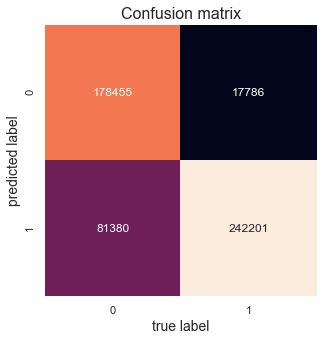

Accuracy_score: 80.9
Precision_score: 93.2
Recall_score:  74.9
F1_score: 83.0


In [30]:
#predict and perform confusion matrix on Training Set
catboost_predictions, catboost_groundtruths = get_prediction_classes(catboost_model, x_train, y_train)

# show confusion matrix
show_confusion_matrix(catboost_predictions, catboost_groundtruths, size=1)

**SoftVoting**

In [34]:
from sklearn.ensemble import VotingClassifier

estimator=[('knn', knn_model), ('Randomforest', rfc_model), ('Catboost', catboost_model)]

SoftVoting_model = VotingClassifier(estimators=estimator,voting="soft")
SoftVoting_model.fit(x_train,y_train)

0:	learn: 0.4726949	total: 35ms	remaining: 1.71s
1:	learn: 0.4376393	total: 82.9ms	remaining: 1.99s
2:	learn: 0.4272244	total: 125ms	remaining: 1.95s
3:	learn: 0.4230067	total: 167ms	remaining: 1.93s
4:	learn: 0.4214735	total: 212ms	remaining: 1.91s
5:	learn: 0.4201769	total: 258ms	remaining: 1.89s
6:	learn: 0.4196933	total: 306ms	remaining: 1.88s
7:	learn: 0.4191941	total: 350ms	remaining: 1.84s
8:	learn: 0.4181218	total: 391ms	remaining: 1.78s
9:	learn: 0.4177497	total: 430ms	remaining: 1.72s
10:	learn: 0.4173866	total: 475ms	remaining: 1.69s
11:	learn: 0.4169655	total: 514ms	remaining: 1.63s
12:	learn: 0.4166643	total: 553ms	remaining: 1.57s
13:	learn: 0.4158689	total: 594ms	remaining: 1.53s
14:	learn: 0.4155951	total: 631ms	remaining: 1.47s
15:	learn: 0.4152996	total: 667ms	remaining: 1.42s
16:	learn: 0.4150148	total: 706ms	remaining: 1.37s
17:	learn: 0.4146677	total: 749ms	remaining: 1.33s
18:	learn: 0.4143557	total: 788ms	remaining: 1.28s
19:	learn: 0.4141254	total: 824ms	remaini

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'leaf_size': [30, 40,
                                                                     50],
                                                       'n_neighbors': [3, 5, 7],
                                                       'weights': ['uniform',
                                                                   'distance']},
                                           scoring='accuracy')),
                             ('Randomforest',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(),
                                           param_grid={'criterion': ['entropy',
                                                                     'gini'],
                                                 

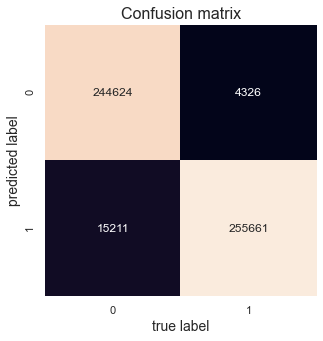

Accuracy_score: 96.2
Precision_score: 98.3
Recall_score:  94.4
F1_score: 96.3


In [36]:
#predict and perform confusion matrix on Training Se
SoftVoting_predictions, SoftVoting_groundtruths = get_prediction_classes(SoftVoting_model, x_train, y_train)

# show confusion matrix
show_confusion_matrix(SoftVoting_predictions, SoftVoting_groundtruths, size=1)

### 4.2 Conclusion:
- Amost all model are performing very good as we expected on train set with 95% - 96% for accuracy score and F1 score, except CatBoost model. The Precision score of all model larger than recall score , it ranges from 93% to 98%. This will help the company avoid wasting money and resources on a high number of false positive clients.

- Gridsearch algorithm help us identify the best parameters and best model for these ensemble method.

## 5. EVALUATION

**KNeighborsClassifier model**

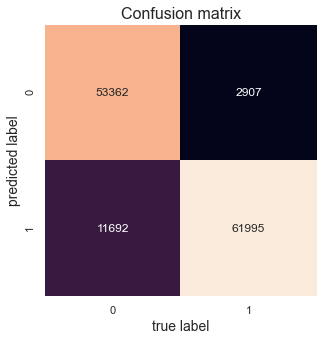

Accuracy_score: 88.8
Precision_score: 95.5
Recall_score:  84.1
F1_score: 89.5


In [49]:
#predict on Test Set
knn_test_predictions, knn_test_groundtruths = get_prediction_classes(knn_model, x_test, y_test)

# show confusion matrix
show_confusion_matrix(knn_test_predictions, knn_test_groundtruths, size=1)

**RandomForestClassifier Model**

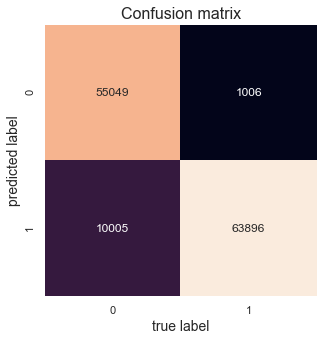

Accuracy_score: 91.5
Precision_score: 98.4
Recall_score:  86.5
F1_score: 92.1


In [39]:
#predict on Test Set
rfc_test_predictions, rfc_test_groundtruths = get_prediction_classes(rfc_model, x_test, y_test)

# show confusion matrix
show_confusion_matrix(rfc_test_predictions, rfc_test_groundtruths, size=1)

**CatBoostClassifier Model**

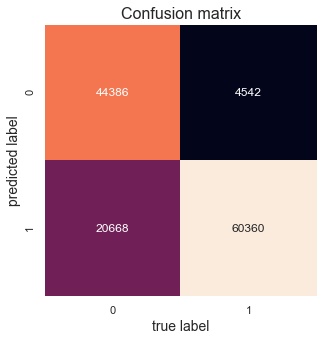

Accuracy_score: 80.6
Precision_score: 93.0
Recall_score:  74.5
F1_score: 82.7


In [40]:
#predict on Test Set
catboost_test_predictions, catboost_test_groundtruths = get_prediction_classes(catboost_model, x_test, y_test)

# show confusion matrix
show_confusion_matrix(catboost_test_predictions, catboost_test_groundtruths, size=1)

**SoftVoting Model**

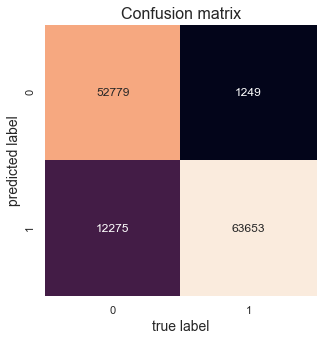

Accuracy_score: 89.6
Precision_score: 98.1
Recall_score:  83.8
F1_score: 90.4


In [52]:
# Predict on test_set
SoftVoting_test_predictions, SoftVoting_test_groundtruths= get_prediction_classes(SoftVoting_model, x_test, y_test)

# show confusion matrix
show_confusion_matrix(SoftVoting_test_predictions, SoftVoting_test_groundtruths, size=1)

Report the accuracy of models using different evaluation metrics before fine-tune on training set and testing set:

In [54]:

scores = {'Accuracy_training':{'KNN': round(accuracy_score(knn_predictions, knn_groundtruths),2),
                                'RandomForest': round(accuracy_score(rfc_predictions, rfc_groundtruths),2),
                                'catboost': round(accuracy_score(catboost_predictions, catboost_groundtruths),2),
                                'SorfVoting': round(accuracy_score(SoftVoting_predictions, SoftVoting_groundtruths),2)},
          
            'Accuracy_testing':{'KNN': round(accuracy_score(knn_test_predictions, knn_test_groundtruths),2),
                                'RandomForest': round(accuracy_score(rfc_test_predictions, rfc_test_groundtruths),2),
                                'catboost': round(accuracy_score(catboost_test_predictions, catboost_test_groundtruths),2),
                                'SorfVoting': round(accuracy_score(SoftVoting_test_predictions, SoftVoting_test_groundtruths),2)},
              
            'F1_scores_training':{'KNN': round(f1_score(knn_predictions, knn_groundtruths),2),
                                'RandomForest': round(f1_score(rfc_predictions, rfc_groundtruths),2),
                                'catboost': round(f1_score(catboost_predictions, catboost_groundtruths),2),
                                 'SorfVoting': round(f1_score(SoftVoting_predictions, SoftVoting_groundtruths),2)},
 
            'F1_scores_testing':{'KNN': round(f1_score(knn_test_predictions, knn_test_groundtruths),2),
                               'RandomForest': round(f1_score(rfc_test_predictions, rfc_test_groundtruths),2),
                               'catboost': round(f1_score(catboost_test_predictions, catboost_test_groundtruths),2),
                                'SorfVoting': round(f1_score(SoftVoting_test_predictions, SoftVoting_test_groundtruths),2)}}

metrics_df=pd.DataFrame(scores)
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={"index": "Model"},inplace=True)
metrics_df

,Model,Accuracy_training,Accuracy_testing,F1_scores_training,F1_scores_testing
0,KNN,0.95,0.89,0.95,0.89
1,RandomForest,0.96,0.92,0.96,0.92
2,catboost,0.81,0.81,0.83,0.83
3,SorfVoting,0.96,0.90,0.96,0.90


**CONCLUSION:**

Based on our metric, we can see the best performing models is RandomForest. It has 96% accuracy and 97% weighted-avg F1 score on training set. Therefore we decided to use RandormForest model.

CatBoost model using ensemble method but didn't perform better than KNN model. SoftVoting and K-nearest neighbors also perform a very good result as Randomforest model

RandomForest model is a little bit overfitted because it has higher difference between training set and testing set  (0.96% vs 0.92%), but with 96% True Positive precision, it is obviously will boost conversion ratio after this model is implemented in the company. It will boost sales/marketing team performance because now they know which customer to be targeted (The Predicted Yes Response).

